In [16]:
!pip install scipy pypoman

Iter=0, success=True, gap=2.0
Iter=1, success=True, gap=1.1111111111111112
Iter=2, success=True, gap=0.6172839506172839
Iter=3, success=True, gap=0.34293552812071326
Iter=4, success=True, gap=0.1905197378448407
Iter=5, success=True, gap=0.10584429880268927
Iter=6, success=True, gap=0.05880238822371626
Iter=7, success=True, gap=0.03266799345762014
Iter=8, success=True, gap=0.018148885254233412
Iter=9, success=True, gap=0.010082714030129673


/tmp/ipykernel_9526/1597623289.py:23: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(b - np.dot(A, x)))
/tmp/ipykernel_9526/1597623289.py:83: UserWarning: No contour levels were found within the data range.
  ax.contour(X, Y, Z, levels=lev, colors='black', linewidths=1)


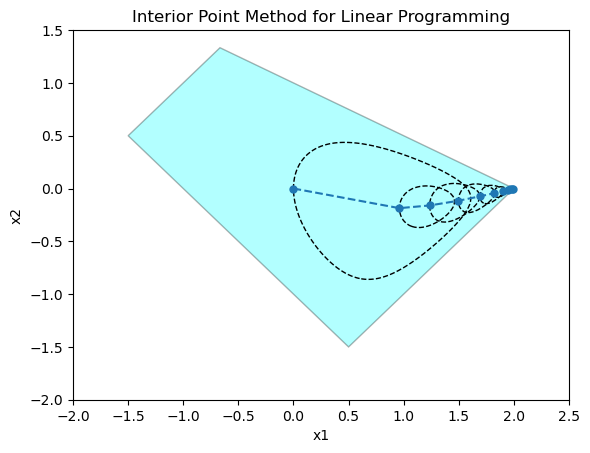

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import pypoman
from scipy.spatial import ConvexHull

# Define the objective function
c = np.array([-1, 0])  # coefficient of decision variables in the objective function

# Define the inequality constraints
A = np.array([[1, 2], [1, -1], [-1, 1], [-1, -1]])
b = np.array([2, 2, 2, 1])

# Define the initial feasible point
x0 = np.array([0, 0])

# Define the function to be minimized
def objective(x):
    return np.dot(c, x)  # minimize c'x

# Define the barrier function and its Jacobian
def barrier(x):
    return -np.sum(np.log(b - np.dot(A, x)))

def jacobian_barrier(x):
    return np.dot(A.T, (1/ (b-A.dot(x))))

# Define the function to be minimized for the interior point method
def func_to_minimize(x, t):
    return objective(x) + barrier(x)/t

def jacobian_func(x, t):
    return c + jacobian_barrier(x)/t

# Set the value of t
t = 1

# Define the list of x_list for plotting
x=x0
x_list = [x]
t_list = [t]

# Implement the interior point method
for i in range(10):
    # Define the function to be minimized and its Jacobian
    func = lambda x: func_to_minimize(x, t)
    jac = lambda x: jacobian_func(x, t)
    
    # Solve the optimization problem
    res = minimize(func, x, method='Newton-CG', jac=jac)
    print(f"Iter={i}, success={res.success}, gap={2/t}")
    
    # Update t and x0
    t *= 1.8
    x = res.x.copy()
    t_list += [t]
    x_list += [x]
    
# Convert the list of x_list to a NumPy array
x_list = np.array(x_list)

# Evaluate the level sets 
levels = np.sort([func_to_minimize(x, t) for x, t in zip(x_list, t_list)])

# Plot the movement of the solution point
fig, ax = plt.subplots()
vertices = pypoman.compute_polytope_vertices(A, b)
vertices = np.vstack(vertices) # shape (n, 2)
indices = ConvexHull(vertices).vertices
vertices = vertices[indices, :]

delta = 0.025
x_grid = np.arange(-2.0, 2.5, delta)
y_grid = np.arange(-2.0, 1.5, delta)
X, Y = np.meshgrid(x_grid, y_grid)
Z = np.zeros_like(X)

def plot_contour(point, t):	
	for i in range(len(x_grid)):
		for j in range(len(y_grid)):
			Z[j, i] = func_to_minimize([x_grid[i], y_grid[j]], t)
	lev = [func_to_minimize(point, t)]
	ax.contour(X, Y, Z, levels=lev, colors='black', linewidths=1)
        
for point, t in zip(x_list, t_list):
    plot_contour(point, t)

ax.fill(vertices[:, 0], vertices[:, 1], color="cyan",
         alpha=0.3, edgecolor='black', linewidth=1)
ax.set_xlim([-2, 2.5])
ax.set_ylim([-2, 1.5])
ax.plot(x_list[:, 0], x_list[:, 1], 'o--', markersize=5)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Interior Point Method for Linear Programming')
plt.show()

